In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
from sklearn.cluster import OPTICS
op=OPTICS(min_samples=2).fit(x)
op.fit_predict(x)

C:\Users\Diwali 6\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_optics.py:1084: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Diwali 6\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_optics.py:1084: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([ 0, 41, 51, 41,  0, 41, 51, 42, 51, -1, 50, 42, 50, 40, 50, 40,  1,
       -1, -1, 42,  1, 39, 51, 39, 49, 37,  2, -1,  2, 37, 52, 36, 52, 38,
       49, 37, 49, 36,  3, 36,  4, 38,  4, 35,  3, 35, 35, 34,  5,  5,  9,
       13,  9, 13,  6, 34,  8,  6,  8,  6, 10, 10,  8, 12,  8, 12,  8,  7,
       12,  7, 11, 34, -1, 11, 15, 14, 14, 15, 14, 16, 14, 14, 16, -1, 14,
       15, 18, 17, 18, -1, 17, -1, 21, -1, 23, -1, -1, 21, 23, 21, 23, 20,
       -1, 19, 19, 23, -1, 22, 23, 20, -1, 19, -1, 22, -1, -1, -1, 24, -1,
       24, 24, -1, 24, 61, 56, 44, 25, 61, 30, 44, 30, 44, 25, 43, 31, 61,
       31, 43, 58, 43, 31, 61, 56, 48, 58, 61, 26, 45, 28, 48, 29, 48, 28,
       46, 29, 48, 32, 46, 32, 45, 26, -1, 58, -1, 27, 47, 57, 62, 27, 64,
       33, 47, 33, 62, 33, 62, 33, 64, 57, -1, 60, 54, 57, 54, 60, -1, 53,
       55, 57, -1, 53, 55, 59, -1, 59, 63, 59, 63, 59, 63])

In [10]:
labels=op.labels_
labels

array([ 0, 41, 51, 41,  0, 41, 51, 42, 51, -1, 50, 42, 50, 40, 50, 40,  1,
       -1, -1, 42,  1, 39, 51, 39, 49, 37,  2, -1,  2, 37, 52, 36, 52, 38,
       49, 37, 49, 36,  3, 36,  4, 38,  4, 35,  3, 35, 35, 34,  5,  5,  9,
       13,  9, 13,  6, 34,  8,  6,  8,  6, 10, 10,  8, 12,  8, 12,  8,  7,
       12,  7, 11, 34, -1, 11, 15, 14, 14, 15, 14, 16, 14, 14, 16, -1, 14,
       15, 18, 17, 18, -1, 17, -1, 21, -1, 23, -1, -1, 21, 23, 21, 23, 20,
       -1, 19, 19, 23, -1, 22, 23, 20, -1, 19, -1, 22, -1, -1, -1, 24, -1,
       24, 24, -1, 24, 61, 56, 44, 25, 61, 30, 44, 30, 44, 25, 43, 31, 61,
       31, 43, 58, 43, 31, 61, 56, 48, 58, 61, 26, 45, 28, 48, 29, 48, 28,
       46, 29, 48, 32, 46, 32, 45, 26, -1, 58, -1, 27, 47, 57, 62, 27, 64,
       33, 47, 33, 62, 33, 62, 33, 64, 57, -1, 60, 54, 57, 54, 60, -1, 53,
       55, 57, -1, 53, 55, 59, -1, 59, 63, 59, 63, 59, 63])

In [11]:
x['cluster_group']=labels
supervised=x
supervised

,Annual Income (k$),Spending Score (1-100),cluster_group
0,15,39,0
1,15,81,41
2,16,6,51
3,16,77,41
4,17,40,0
...,...,...,...
195,120,79,63
196,126,28,59
197,126,74,63
198,137,18,59


In [13]:
import sklearn.metrics as metric
print(
    "Silhouette Coefficient: %0.3f"
    % metric.silhouette_score(x, labels, metric="sqeuclidean")
)

Silhouette Coefficient: 0.591


In [14]:
supervised.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'cluster_group'], dtype='str')

In [15]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

65

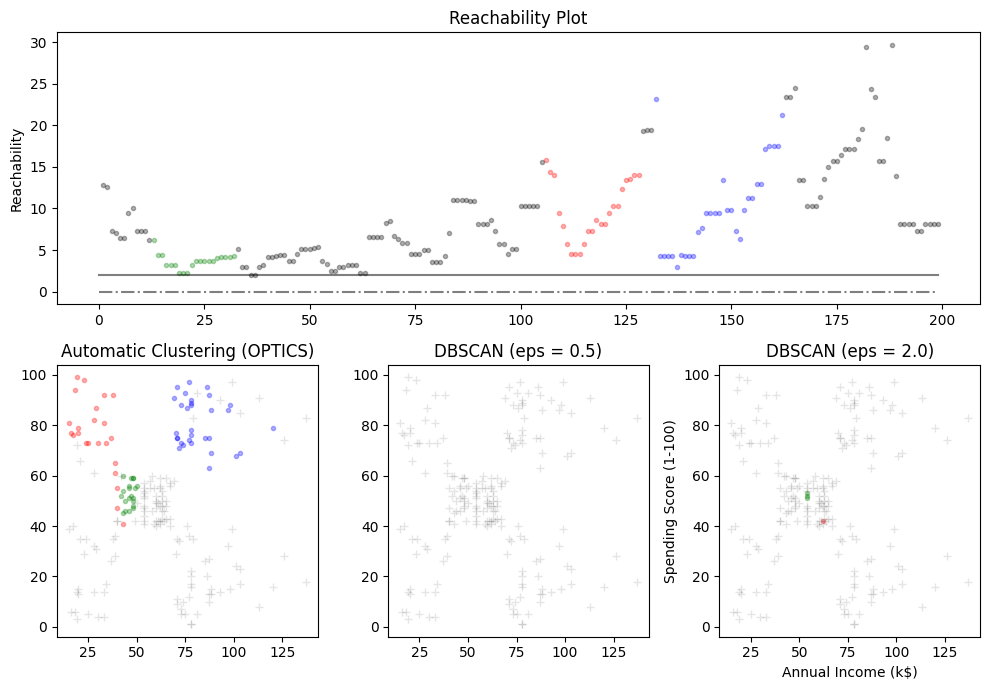

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Fit OPTICS
op = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
op.fit(x)

# Extract DBSCAN-like clusters from OPTICS
labels_050 = cluster_optics_dbscan(
    reachability=op.reachability_,
    core_distances=op.core_distances_,
    ordering=op.ordering_,
    eps=0.5,
)

labels_200 = cluster_optics_dbscan(
    reachability=op.reachability_,
    core_distances=op.core_distances_,
    ordering=op.ordering_,
    eps=2.0,
)

space = np.arange(len(x))
reachability = op.reachability_[op.ordering_]
labels = op.labels_[op.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)

ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability")
ax1.set_title("Reachability Plot")

# OPTICS clusters
for klass, color in enumerate(colors):
    Xk = x.iloc[op.labels_ == klass]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], color, alpha=0.3)

ax2.plot(x.iloc[op.labels_ == -1, 0], x.iloc[op.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering (OPTICS)")

# DBSCAN eps = 0.5
for klass, color in enumerate(colors):
    Xk = x.iloc[labels_050 == klass]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], color, alpha=0.3)

ax3.plot(x.iloc[labels_050 == -1, 0], x.iloc[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("DBSCAN (eps = 0.5)")

# DBSCAN eps = 2.0
for klass, color in enumerate(colors):
    Xk = x.iloc[labels_200 == klass]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], color, alpha=0.3)

ax4.plot(x.iloc[labels_200 == -1, 0], x.iloc[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("DBSCAN (eps = 2.0)")
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])

plt.tight_layout()
plt.show()
